#Installing the DoWhy library for causal inference and importing the necessary libraries

In [ ]:
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 16.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# import dowhy
from dowhy import CausalModel
import matplotlib.ticker as ticker

#Loading the World Bank dataset and preprocessing the dataframe

In [ ]:
world_development_df = pd.read_excel('P_Data_Extract_From_World_Development_Indicators_all_years.xlsx')

In [ ]:
world_development_df.shape

(16960, 63)

In [ ]:
world_development_df.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
       'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]',
       'Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]',
       'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
       'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]',
       'Commercial bank branches (per 100,000 adults) [FB.CBK.BRCH.P5]',
       'Compulsory education, duration (years) [SE.COM.DURS]',
       'Control of Corruption: Estimate [CC.EST]',
       'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]',
       'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]',
       'Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]',
       'Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]',
       'Employ

In [ ]:
world_development_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Data columns (total 63 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Country Name                                                                                                  16960 non-null  object 
 1   Country Code                                                                                                  16960 non-null  object 
 2   Time                                                                                                          16960 non-null  int64  
 3   Time Code                                                                                                     16960 non-null  object 
 4   Access to electricity (% of population) [EG.ELC.ACCS

In [ ]:
world_development_df['Time'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
world_development_df['Time Code'].unique()

array(['YR1960', 'YR1961', 'YR1962', 'YR1963', 'YR1964', 'YR1965',
       'YR1966', 'YR1967', 'YR1968', 'YR1969', 'YR1970', 'YR1971',
       'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976', 'YR1977',
       'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982', 'YR1983',
       'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988', 'YR1989',
       'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994', 'YR1995',
       'YR1996', 'YR1997', 'YR1998', 'YR1999', 'YR2000', 'YR2001',
       'YR2002', 'YR2003', 'YR2004', 'YR2005', 'YR2006', 'YR2007',
       'YR2008', 'YR2009', 'YR2010', 'YR2011', 'YR2012', 'YR2013',
       'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018', 'YR2019',
       'YR2020', 'YR2021', 'YR2022', 'YR2023'], dtype=object)

In [ ]:
# Dropping the 'Time Code' column
world_development_df = world_development_df.drop(['Time Code'], axis=1)

In [ ]:
# Check for missing values
print(world_development_df.isnull().sum().sort_values().tail(60))


Time                                                                                                                0
Net migration [SM.POP.NETM]                                                                                         0
Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]                                                        265
Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]                                                      265
Population, total [SP.POP.TOTL]                                                                                   295
Population ages 15-64, total [SP.POP.1564.TO]                                                                     295
Urban population (% of total population) [SP.URB.TOTL.IN.ZS]                                                      391
Population growth (annual %) [SP.POP.GROW]                                                                        562
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]   

Unfortunately, there are a lot of missing values. For the first exploratory analysis, this doesn't matter so much. When calculating correlations, all pairs that have one or two missing values are ignored. On the other hand, line charts in Matplotlib may cause problems, because no lines between two adjacent data points are drawn if the time difference between them is more than one year.

In [ ]:
world_development_df['Country Name'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

In [ ]:
# A check for duplicated rows. For this, I use a subset that excludes 'Country Name'
# and 'Country Code', to be 100% sure that country aggregates like for example
# 'Middle East & North Africa' and 'Middle East & North Africa (IDA & IBRD countries)'
# are not the same even though they have different names.
print(world_development_df.duplicated(subset = ['Time',
       'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
       'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]',
       'Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]',
       'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
       'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]',
       'Commercial bank branches (per 100,000 adults) [FB.CBK.BRCH.P5]',
       'Compulsory education, duration (years) [SE.COM.DURS]',
       'Control of Corruption: Estimate [CC.EST]',
       'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]',
       'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]',
       'Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]',
       'Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]',
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.FE.ZS]',
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.MA.ZS]',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]',
       'Exports of goods and services (BoP, current US$) [BX.GSR.GNFS.CD]',
       'External balance on goods and services (% of GDP) [NE.RSB.GNFS.ZS]',
       'Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]',
       'Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]',
       'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]',
       'GDP (current US$) [NY.GDP.MKTP.CD]',
       'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
       'GDP per capita (current US$) [NY.GDP.PCAP.CD]',
       'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]',
       'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
       'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]',
       'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]',
       'GNI (current US$) [NY.GNP.MKTP.CD]',
       'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]',
       'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
       'Government Effectiveness: Estimate [GE.EST]',
       'Individuals using the Internet (% of population) [IT.NET.USER.ZS]',
       'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]',
       'Labor force, total [SL.TLF.TOTL.IN]',
       'Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]',
       'Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]',
       'Net migration [SM.POP.NETM]',
       'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
       'People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]',
       'Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]',
       'Population ages 15-64, total [SP.POP.1564.TO]',
       'Population density (people per sq. km of land area) [EN.POP.DNST]',
       'Population growth (annual %) [SP.POP.GROW]',
       'Population, total [SP.POP.TOTL]',
       'Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]',
       'Regulatory Quality: Estimate [RQ.EST]',
       'Rule of Law: Estimate [RL.EST]',
       'Surface area (sq. km) [AG.SRF.TOTL.K2]',
       'Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]',
       'Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]',
       'Trade (% of GDP) [NE.TRD.GNFS.ZS]',
       'UHC service coverage index [SH.UHC.SRVS.CV.XD]',
       'Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]',
       'Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]',
       'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]',
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]',
       'Voice and Accountability: Estimate [VA.EST]']).sort_values())

0        False
11298    False
11299    False
11300    False
11301    False
         ...  
5649     False
5648     False
5653     False
16959    False
9791      True
Length: 16960, dtype: bool


In [ ]:
world_development_df.loc[[1599, 9791], ['Country Name', 'Country Code', 'Time', 'Compulsory education, duration (years) [SE.COM.DURS]', 'Net migration [SM.POP.NETM]']]

,Country Name,Country Code,Time,"Compulsory education, duration (years) [SE.COM.DURS]",Net migration [SM.POP.NETM]
1599,Bermuda,BMU,2023,13.0,0
9791,Marshall Islands,MHL,2023,13.0,0


Without including 'Country Name' and 'Country Code' there was one duplicate row. This was the result of many missing values for two different countries for the year 2023. They are different countries, at different ends of the world, so there are no real duplicate rows in the dataframe.

#Loading the Economist Democracy Index, preprocessing it and left joining it with the World development indicators dataframe

In [ ]:
economist_democracy_index_df = pd.read_excel('The_Economist_Democracy_Index.xlsx')

In [ ]:
economist_democracy_index_df.shape

(2672, 3)

In [ ]:
economist_democracy_index_df.columns

Index(['Country Name', 'Time', 'The Economist Democracy Index'], dtype='object')

In [ ]:
economist_democracy_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   2672 non-null   object 
 1   Time                           2672 non-null   int64  
 2   The Economist Democracy Index  2672 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 62.8+ KB


In [ ]:
economist_democracy_index_df.head()

,Country Name,Time,The Economist Democracy Index
0,Afghanistan,2006,3.06
1,Afghanistan,2008,3.02
2,Afghanistan,2010,2.48
3,Afghanistan,2011,2.48
4,Afghanistan,2012,2.48


In [ ]:
# In a previous step, in Excel, I made sure that the names of countries in both datasets
# were the same. Whenever they were different, in most cases I chose the shortest
# and clearest name of the two.
economist_democracy_index_df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cabo Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Congo, Dem. Rep.', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Timor-Leste', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy'

In [ ]:
# Merging or left joining of the two dataframes based on their values
# in the columns 'Country Name' AND 'Time'.
world_development_enriched_df = pd.merge(world_development_df, economist_democracy_index_df, on=['Country Name', 'Time'], how='left')

In [ ]:
world_development_enriched_df.shape

(16960, 63)

In [ ]:
# I want to have a dataframe with only countries, so without the aggregates
countries_development_df = world_development_enriched_df.loc[world_development_enriched_df['Country Name'].isin(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'North Korea',
       'South Korea', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia',
       'Rwanda', 'Samoa', 'San Marino', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone',
       'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan',
       'Spain', 'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'St. Vincent and the Grenadines',
       'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Viet Nam', 'Virgin Islands (U.S.)', 'Palestine', 'Yemen',
       'Zambia', 'Zimbabwe'])]

In [ ]:
countries_development_df.shape

(13888, 63)

In [ ]:
countries_development_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13888 entries, 0 to 16959
Data columns (total 63 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Country Name                                                                                                  13888 non-null  object 
 1   Country Code                                                                                                  13888 non-null  object 
 2   Time                                                                                                          13888 non-null  int64  
 3   Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                      6102 non-null   float64
 4   Adjusted savings: education expenditure (% of GNI) [NY.AD

In [ ]:
print(countries_development_df.isnull().sum().sort_values().tail(60))

Net migration [SM.POP.NETM]                                                                                         0
Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]                                                      217
Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]                                                        217
Population, total [SP.POP.TOTL]                                                                                   247
Population ages 15-64, total [SP.POP.1564.TO]                                                                     247
Urban population (% of total population) [SP.URB.TOTL.IN.ZS]                                                      343
Population growth (annual %) [SP.POP.GROW]                                                                        466
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]                                                             612
Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]   

In [ ]:
countries_development_df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'F

In [ ]:
# Creating one more column, 'Sustained GDP growth'
for country in countries_development_df['Country Name'].unique():
    for year in countries_development_df['Time'].unique()[0 : -5]:
        # The last five years are excluded, because otherwise we get
        # an index error when calculating the future GDP
        country_current = (
            (countries_development_df['Country Name'] == country) &
            (countries_development_df['Time'] == year)
        )
        country_future = (
            (countries_development_df['Country Name'] == country) &
            (countries_development_df['Time'] == year + 5)
        )

        current_gdp = countries_development_df.loc[country_current, 'GDP (current US$) [NY.GDP.MKTP.CD]'].values[0]
        future_gdp = countries_development_df.loc[country_future, 'GDP (current US$) [NY.GDP.MKTP.CD]'].values[0]

        sustained_gdp_growth = (future_gdp - current_gdp) / current_gdp

        countries_development_df.loc[country_current, 'Sustained GDP Growth'] = sustained_gdp_growth

<ipython-input-80-74be2b07b5c2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_development_df.loc[country_current, 'Sustained GDP Growth'] = sustained_gdp_growth


In [ ]:
countries_development_df.shape

(13888, 64)

In [ ]:
print(countries_development_df.isnull().sum().sort_values().tail(60))

Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]                                                        217
Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]                                                      217
Population, total [SP.POP.TOTL]                                                                                   247
Population ages 15-64, total [SP.POP.1564.TO]                                                                     247
Urban population (% of total population) [SP.URB.TOTL.IN.ZS]                                                      343
Population growth (annual %) [SP.POP.GROW]                                                                        466
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]                                                             612
Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]                                                             630
Life expectancy at birth, female (years) [SP.DYN.LE00.FE

#Exploratory analysis (correlations)

In [ ]:
correlation_matrix = countries_development_df.corr(numeric_only = True)

In [ ]:
correlation_matrix.shape

(62, 62)

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

The above heatmap is very hard to read, because of the many columns. I will try to divide the columns in four groups and make pairwise heatmaps of those groups, so that the correlation between each column pair will be shown at least once

In [ ]:
variable_group_1 = list(correlation_matrix.columns[0:16]) # 16 variables (0-15)
variable_group_2 = list(correlation_matrix.columns[16:32]) # 16 variables (16-31)
variable_group_3 = list(correlation_matrix.columns[32:47]) # 15 variables (32-46)
variable_group_4 = list(correlation_matrix.columns[47:62]) # 15 variables (47-61)

In [ ]:
print(len(variable_group_1))
print(len(variable_group_2))
print(len(variable_group_3))
print(len(variable_group_4))

16
16
15
15


In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix.loc[(variable_group_1 + variable_group_2), (variable_group_1 + variable_group_2)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix.loc[(variable_group_1 + variable_group_3), (variable_group_1 + variable_group_3)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix.loc[(variable_group_1 + variable_group_4), (variable_group_1 + variable_group_4)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix.loc[(variable_group_2 + variable_group_3), (variable_group_2 + variable_group_3)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix.loc[(variable_group_2 + variable_group_4), (variable_group_2 + variable_group_4)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix.loc[(variable_group_3 + variable_group_4), (variable_group_3 + variable_group_4)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
# for column in correlation_matrix.columns:
  # print('***************************************************************************************************************')
  # print(column)
  # print('***************************************************************************************************************')
  # print(correlation_matrix.loc[correlation_matrix[column] < 1, column].sort_values())
  # The meaningless correlations of 1 are excluded, because 60 is
  # the maximum amount of rows that will be displayed all of them,
  # with 61 rows Google Colab would only show the head and tail

#Exploratory analysis (time trends on a global level)

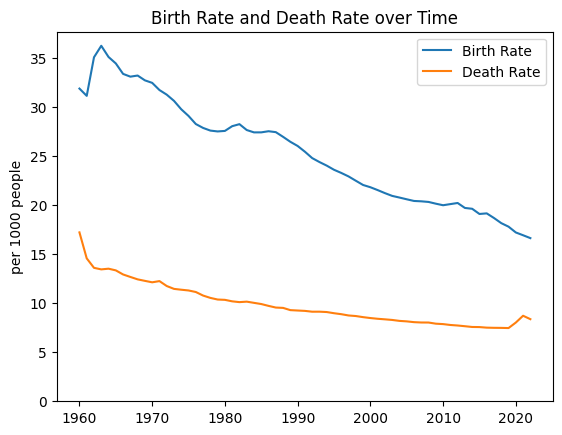

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]'], label = 'Birth Rate')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'], label = 'Death Rate')
plt.title('Birth Rate and Death Rate over Time')
plt.ylabel('per 1000 people')
plt.ylim(bottom=0)
plt.legend()
plt.show()

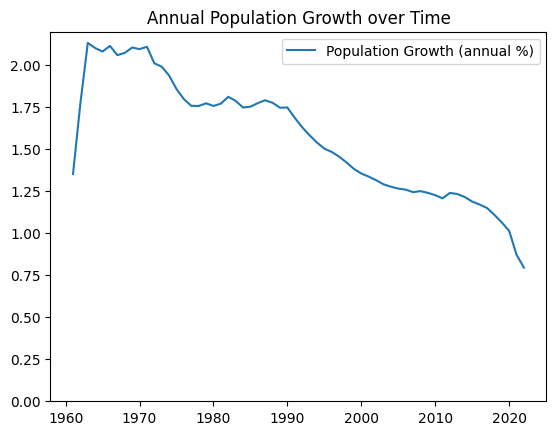

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_df['Country Name'] == 'World']['Population growth (annual %) [SP.POP.GROW]'], label = 'Population Growth (annual %)')
plt.title('Annual Population Growth over Time')
plt.ylim(bottom=0)
plt.legend()
plt.show()

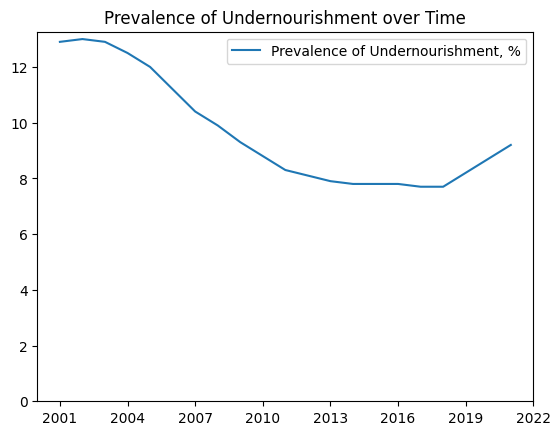

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]'], label = 'Prevalence of Undernourishment, %')
plt.title('Prevalence of Undernourishment over Time')
plt.ylim(bottom=0)
plt.legend()

# Set the x-axis to display integer years
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

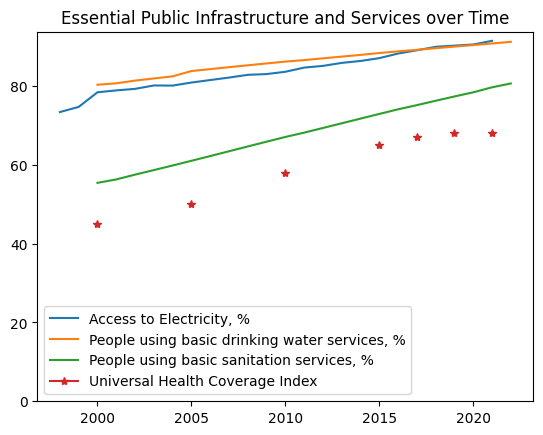

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Access to electricity (% of population) [EG.ELC.ACCS.ZS]'], label = 'Access to Electricity, %')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]'], label = 'People using basic drinking water services, %')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]'], label = 'People using basic sanitation services, %')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['UHC service coverage index [SH.UHC.SRVS.CV.XD]'], label = 'Universal Health Coverage Index', marker = '*')
plt.title('Essential Public Infrastructure and Services over Time')
plt.ylim(bottom=0)
plt.legend()
plt.show()

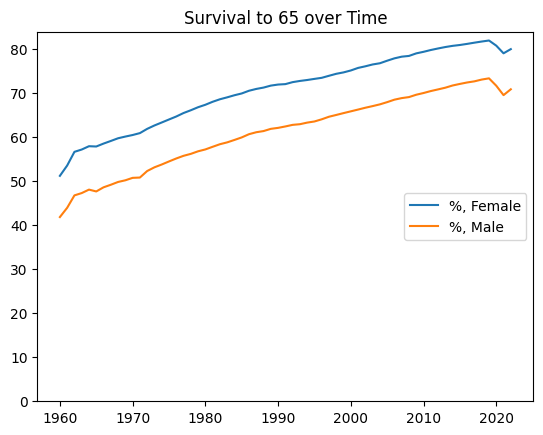

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]'], label = '%, Female')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]'], label = '%, Male')
plt.title('Survival to 65 over Time')
plt.ylim(bottom=0)
plt.legend(loc='center right')
plt.show()

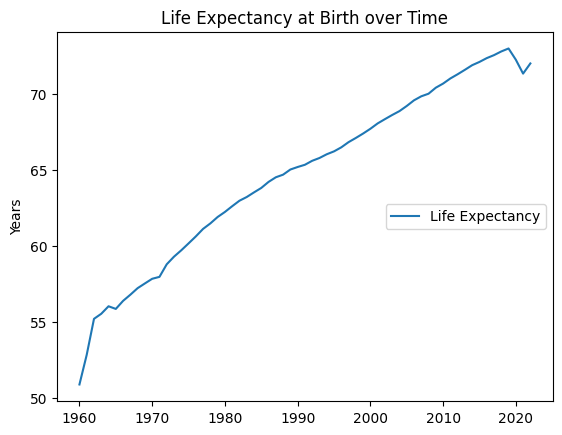

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'], label = 'Life Expectancy')
plt.title('Life Expectancy at Birth over Time')
plt.ylabel('Years')
plt.legend(loc = 'center right')
plt.show()

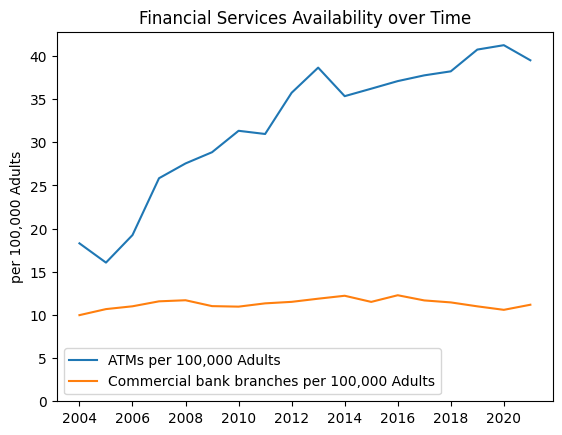

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]'], label = 'ATMs per 100,000 Adults')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Commercial bank branches (per 100,000 adults) [FB.CBK.BRCH.P5]'], label = 'Commercial bank branches per 100,000 Adults')

plt.title('Financial Services Availability over Time')
plt.ylabel('per 100,000 Adults')
plt.ylim(bottom=0)

plt.legend()

# Set the x-axis to display integer years
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

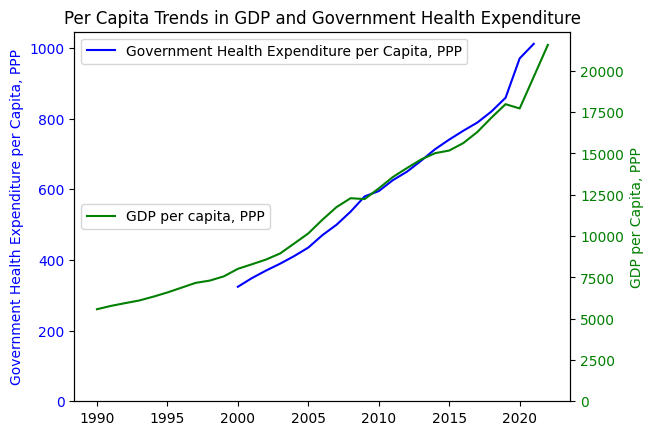

In [ ]:
fig, ax1 = plt.subplots()


ax1.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'],
         world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]'],
         color='b', label='Government Health Expenditure per Capita, PPP')
ax1.set_ylabel('Government Health Expenditure per Capita, PPP', color='b')
ax1.set_ylim(bottom=0)
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'],
         world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]'],
         color='g', label='GDP per capita, PPP')
ax2.set_ylabel('GDP per Capita, PPP', color='g')
ax2.set_ylim(bottom=0)
ax2.tick_params(axis='y', labelcolor='g')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='center left')

plt.title('Per Capita Trends in GDP and Government Health Expenditure')
plt.show()

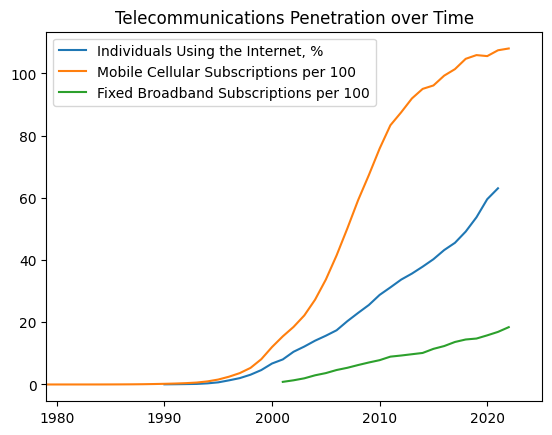

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Individuals using the Internet (% of population) [IT.NET.USER.ZS]'], label = 'Individuals Using the Internet, %')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'], label = 'Mobile Cellular Subscriptions per 100')
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]'], label = 'Fixed Broadband Subscriptions per 100')
plt.title('Telecommunications Penetration over Time')
plt.xlim(left = 1979)
plt.legend()
plt.show()

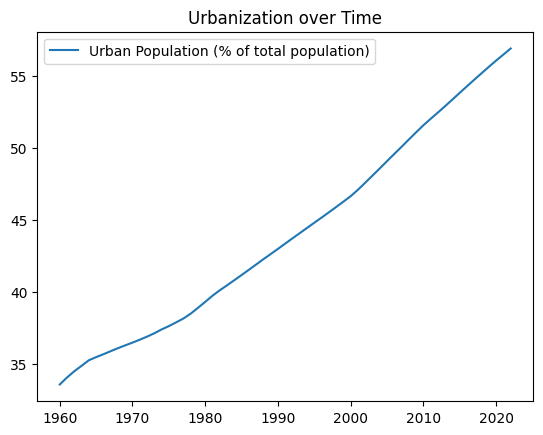

In [ ]:
plt.plot(world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Time'], world_development_enriched_df.loc[world_development_enriched_df['Country Name'] == 'World']['Urban population (% of total population) [SP.URB.TOTL.IN.ZS]'], label = 'Urban Population (% of total population)')
plt.title('Urbanization over Time')
plt.legend()
plt.show()

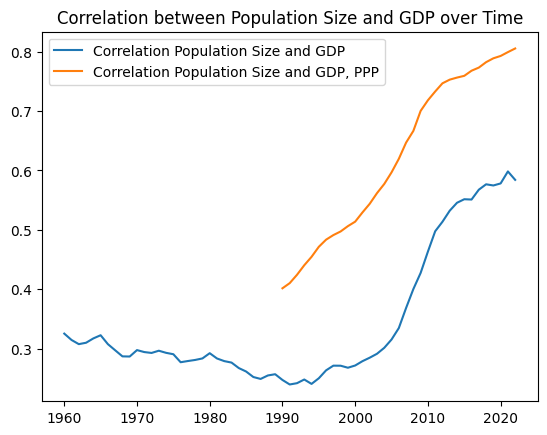

In [ ]:
years_for_correlations = []
correlation_population_gdp = []
correlation_population_gdp_ppp = []
for year in countries_development_df['Time'].unique():
  years_for_correlations.append(year)
  correlation_population_gdp.append(countries_development_df.loc[countries_development_df['Time'] == year, 'Population, total [SP.POP.TOTL]'].corr(countries_development_df.loc[countries_development_df['Time'] == year, 'GDP (current US$) [NY.GDP.MKTP.CD]']))
  correlation_population_gdp_ppp.append(countries_development_df.loc[countries_development_df['Time'] == year, 'Population, total [SP.POP.TOTL]'].corr(countries_development_df.loc[countries_development_df['Time'] == year, 'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]']))

plt.plot(years_for_correlations, correlation_population_gdp, label = 'Correlation Population Size and GDP')
plt.plot(years_for_correlations, correlation_population_gdp_ppp, label = 'Correlation Population Size and GDP, PPP')
plt.title('Correlation between Population Size and GDP over Time')
plt.legend()
plt.show()

We see a lot of similar trends over time. Does this mean that the correlations that we saw in the heatmaps are just a reflection of the fact that they were the result of changes happening at the same time? What would the correlations be if we look at only one year, thus keeping the time variable constant.

I would like to zoom in on a year that is relatively recent, but without a lot of missing values.

#Zooming in on 2021

In [ ]:
years = []
data_volume = []
for year in world_development_enriched_df['Time'].unique():
  print(f"The number of missing values in {year}: {world_development_enriched_df.loc[world_development_enriched_df['Time'] == year].isnull().sum().sum()}")
  years.append(year)
  # data volume is all the rows minus the missing values
  data_volume.append(world_development_enriched_df.shape[0] - world_development_enriched_df.loc[world_development_enriched_df['Time'] == year].isnull().sum().sum())


The number of missing values in 1960: 12122
The number of missing values in 1961: 11262
The number of missing values in 1962: 11226
The number of missing values in 1963: 11226
The number of missing values in 1964: 11219
The number of missing values in 1965: 10900
The number of missing values in 1966: 11107
The number of missing values in 1967: 11068
The number of missing values in 1968: 11042
The number of missing values in 1969: 11027
The number of missing values in 1970: 10118
The number of missing values in 1971: 10304
The number of missing values in 1972: 10280
The number of missing values in 1973: 10267
The number of missing values in 1974: 10246
The number of missing values in 1975: 9937
The number of missing values in 1976: 9866
The number of missing values in 1977: 9794
The number of missing values in 1978: 9764
The number of missing values in 1979: 9741
The number of missing values in 1980: 9640
The number of missing values in 1981: 9570
The number of missing values in 1982: 9

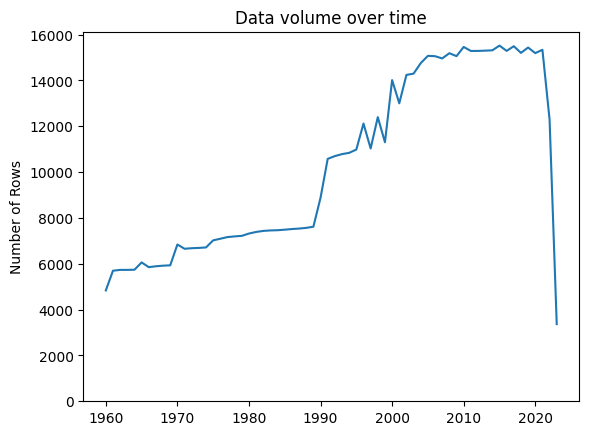

In [ ]:
plt.plot(years, data_volume)
plt.title('Data volume over time')
plt.ylabel('Number of Rows')
plt.ylim(bottom = 0)
plt.show()

Based on the above missing value counts and the data volume graph, I decide to zoom in on 2021, which is relatively recent and has much less missing values and much more data than the even more recent years.

In [ ]:
countries_development_2021_df = countries_development_df.loc[countries_development_df['Time'] == 2021]

In [ ]:
countries_development_2021_df.shape

(217, 64)

In [ ]:
print(countries_development_2021_df.isnull().sum().sort_values().tail(60))

Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]                                                      0
Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]                                                        0
Population ages 15-64, total [SP.POP.1564.TO]                                                                     0
Country Code                                                                                                      0
Time                                                                                                              0
Surface area (sq. km) [AG.SRF.TOTL.K2]                                                                            1
Population density (people per sq. km of land area) [EN.POP.DNST]                                                 1
Urban population (% of total population) [SP.URB.TOTL.IN.ZS]                                                      2
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                

In [ ]:
# I am removing the columns 'Time', which has the same value for all rows and
# 'Sustained GDP Growth', which only has missing values in 2021 as a result of
# how this column was calculated.
countries_development_2021_df = countries_development_2021_df.drop(['Time', 'Sustained GDP Growth'], axis=1)

In [ ]:
correlation_matrix_2021 = countries_development_2021_df.corr(numeric_only = True)

In [ ]:
correlation_matrix_2021.columns

Index(['Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
       'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]',
       'Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]',
       'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
       'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]',
       'Commercial bank branches (per 100,000 adults) [FB.CBK.BRCH.P5]',
       'Compulsory education, duration (years) [SE.COM.DURS]',
       'Control of Corruption: Estimate [CC.EST]',
       'Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]',
       'Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]',
       'Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]',
       'Domestic general government health expenditure per capita, PPP (current international $) [SH.XPD.GHED.PP.CD]',
       'Employment to population ratio, 15+, female (%) (modeled ILO estim

In [ ]:
correlation_matrix_2021.shape

(60, 60)

In [ ]:
variable_group_2021_1 = list(correlation_matrix_2021.columns[0:15]) # 15 variables (0-14)
variable_group_2021_2 = list(correlation_matrix_2021.columns[15:30]) # 15 variables (15-29)
variable_group_2021_3 = list(correlation_matrix_2021.columns[30:45]) # 15 variables (30-44)
variable_group_2021_4 = list(correlation_matrix_2021.columns[45:60]) # 15 variables (45-59)

In [ ]:
print(len(variable_group_2021_1))
print(len(variable_group_2021_2))
print(len(variable_group_2021_3))
print(len(variable_group_2021_4))

15
15
15
15


In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix_2021.loc[(variable_group_2021_1 + variable_group_2021_2), (variable_group_2021_1 + variable_group_2021_2)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix_2021.loc[(variable_group_2021_1 + variable_group_2021_3), (variable_group_2021_1 + variable_group_2021_3)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix_2021.loc[(variable_group_2021_1 + variable_group_2021_4), (variable_group_2021_1 + variable_group_2021_4)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix_2021.loc[(variable_group_2021_2 + variable_group_2021_3), (variable_group_2021_2 + variable_group_2021_3)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix_2021.loc[(variable_group_2021_2 + variable_group_2021_4), (variable_group_2021_2 + variable_group_2021_4)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix_2021.loc[(variable_group_2021_3 + variable_group_2021_4), (variable_group_2021_3 + variable_group_2021_4)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

In [ ]:
noteworthy_high_correlators = ['Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
                               'Fixed broadband subscriptions (per 100 people) [IT.NET.BBND.P2]',
                               'Individuals using the Internet (% of population) [IT.NET.USER.ZS]',
                               'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
                               'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]',
                               'People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]',
                               'Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]',
                               'Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]',
                               'UHC service coverage index [SH.UHC.SRVS.CV.XD]',
                               'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
                               'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]']

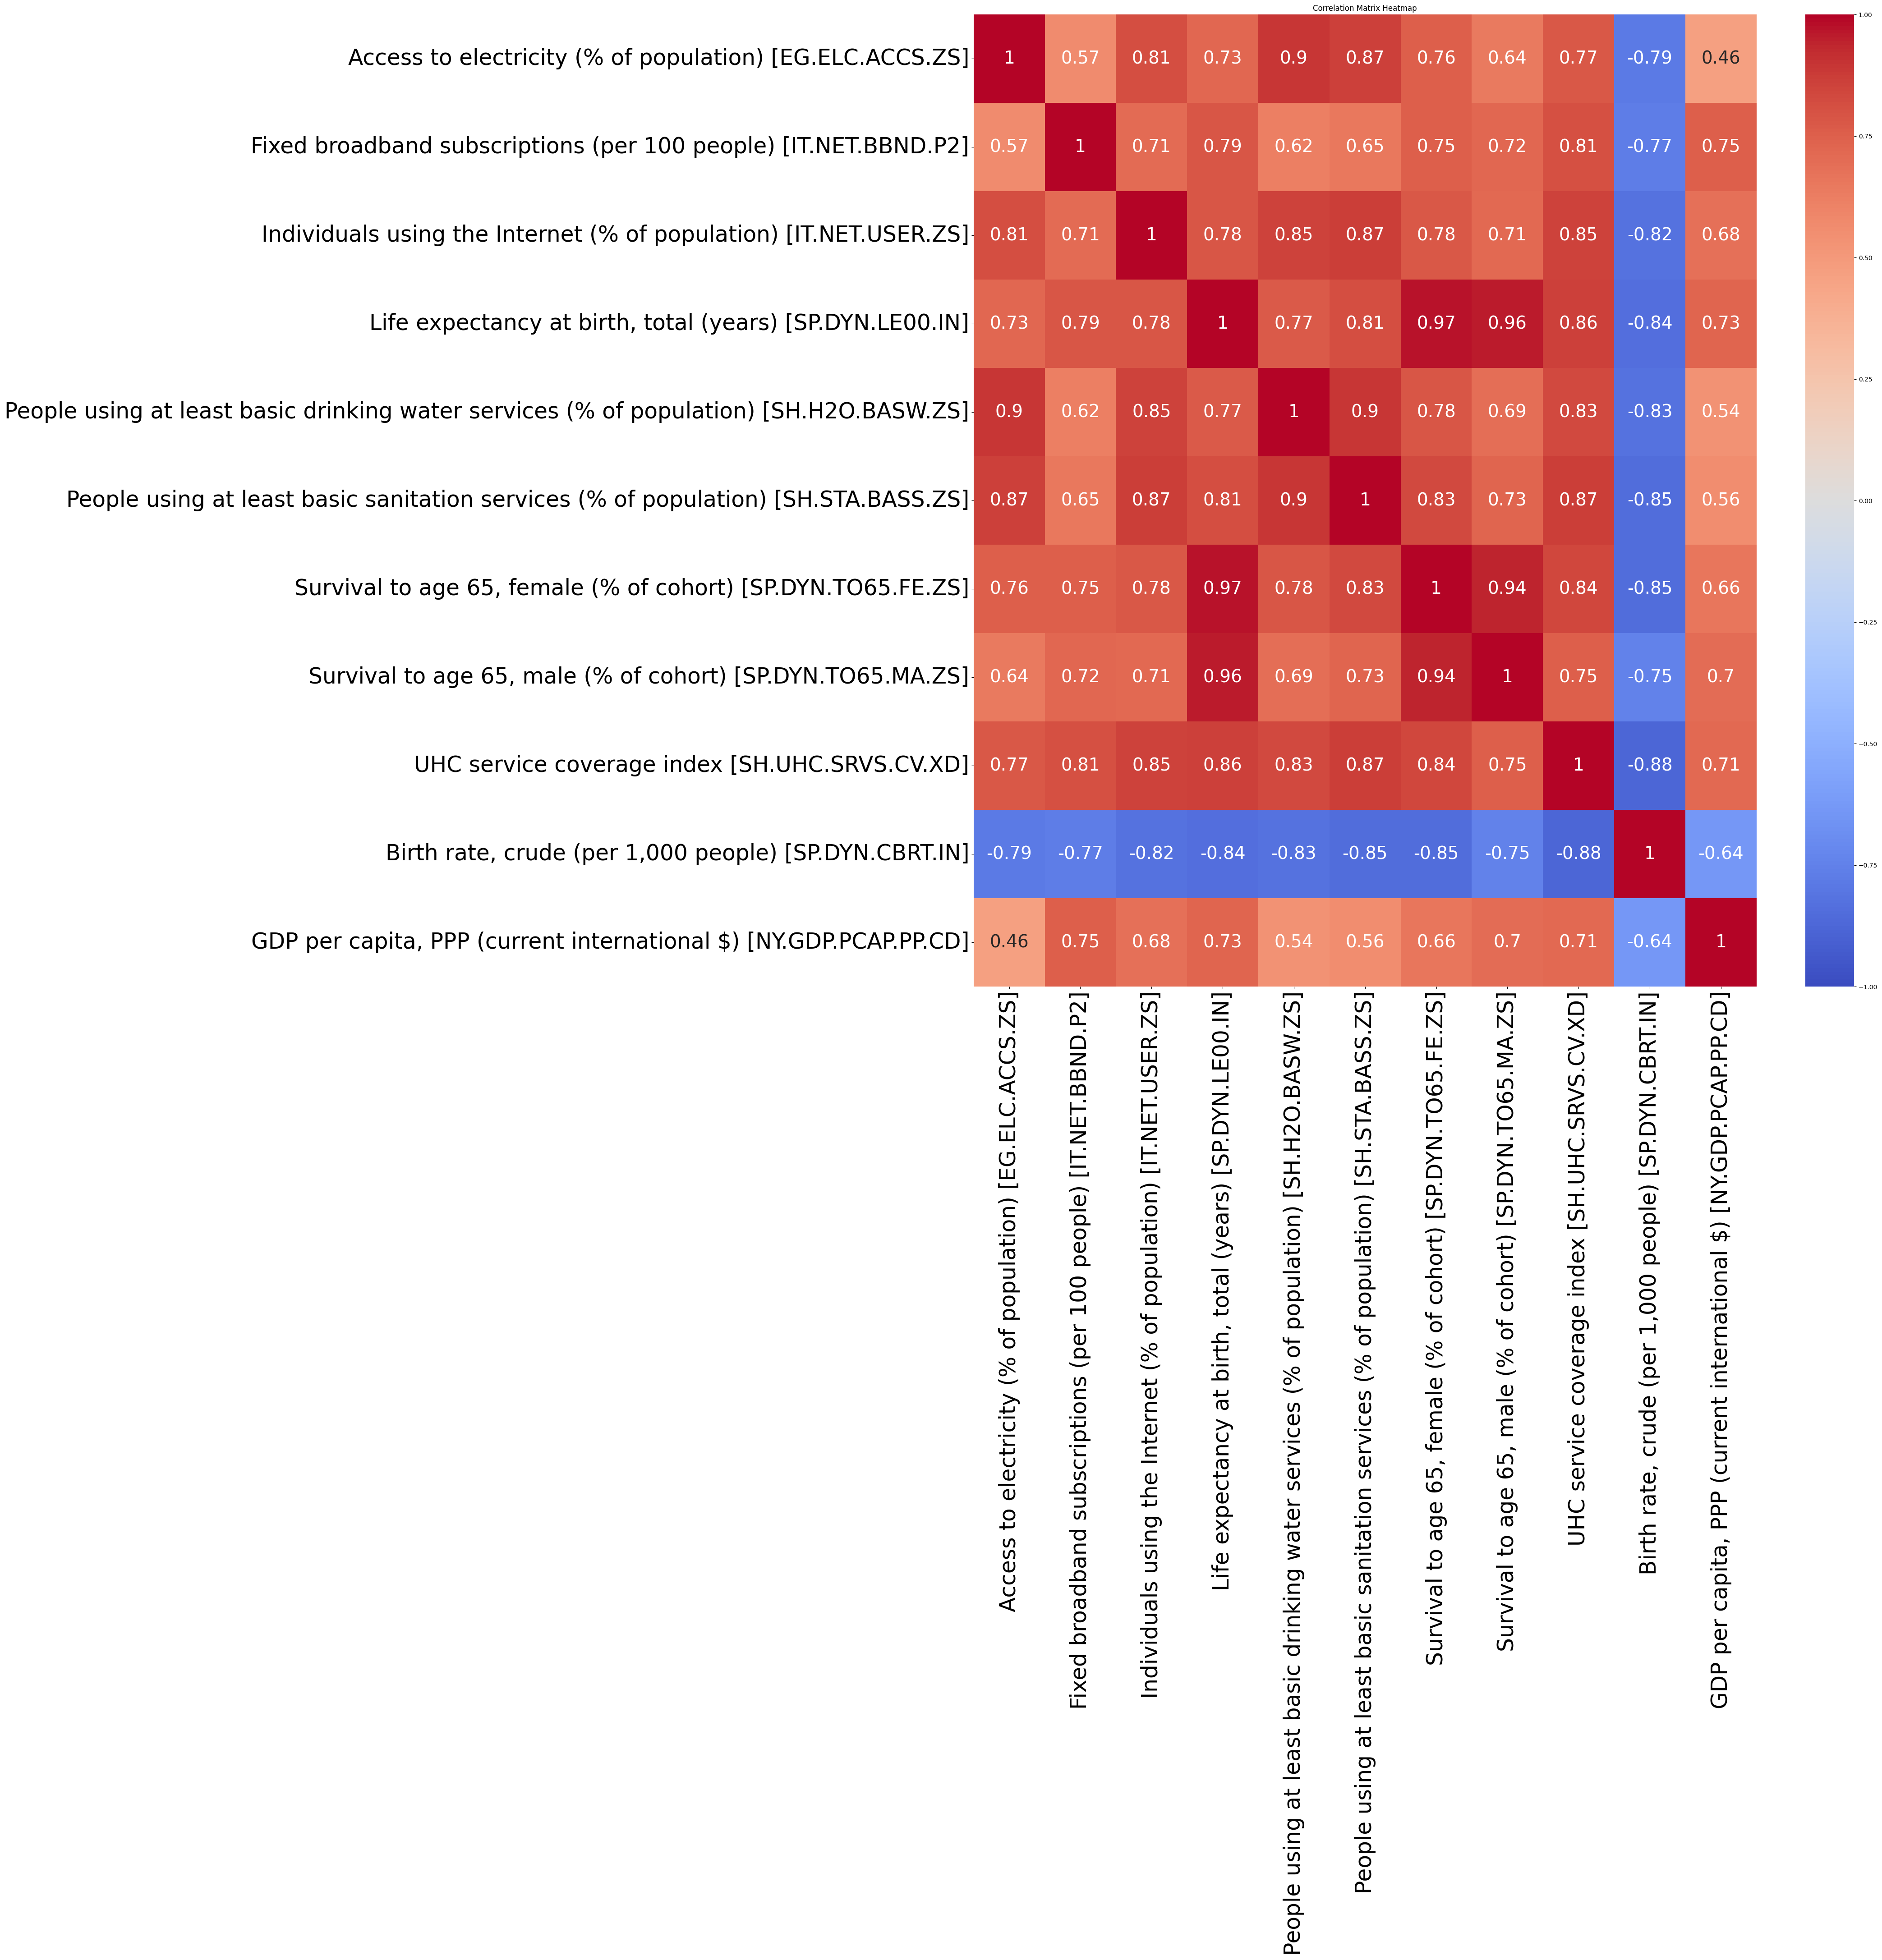

In [ ]:
plt.figure(figsize=(28, 28))
sns.heatmap(correlation_matrix_2021.loc[(noteworthy_high_correlators), (noteworthy_high_correlators)], annot=True, cmap='coolwarm', annot_kws={"size": 28}, vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.xticks(fontsize=35, rotation=90)
plt.yticks(fontsize=35, rotation=0)
plt.show()

There are high positive correlations between:
- access to electricity
- fixed broadband subscriptions (per 100 people)
- individuals using the Internet (% of population)
- life expectancy at birth
- people using at least basic drinking water services (% of population)
- people using at least basic sanitation services (% of population)
- survival to age 65, female
- survival to age 65, male
- universal health coverage

These variables all have a high negative correlation with birth rate.

All these variables are related to how developed and rich a country is, but please note that the correlations with GDP per capita (purchasing power parity), which is also included in the heatmap, are lower.

So the variables listed above may have something that is additional to a country's wealth alone.

In [ ]:
# for column in correlation_matrix_2021.columns:
  # print('***************************************************************************************************************')
  # print(column)
  # print('***************************************************************************************************************')
  # print(correlation_matrix_2021.loc['Access to electricity (% of population) [EG.ELC.ACCS.ZS]': 'The Economist Democracy Index', column].sort_values())
  # Rows with the meaningless correlations with 'Time',
  # which is the same throughout the countries_development_2021_df dataframe,
  # are excluded, because 60 is the maximum amount of rows that are displayed
  # all of them, with 61 rows Google Colab would only show the head and tail

#Causal inference

There are a lot of correlations in the dataset. It would be nice to be able to say something about what causes changes in a variable, for example birth rate or population growth. Therefore, it is interesting to perform causal inference. To this end, the library DoWhy has been installed and imported. To use it, there can be no missing values in the dataframe. These will be handled now. Based on the data volume we saw earlier only the years 2010-2021 will be used.

In [ ]:
countries_development_2010_2021_df = countries_development_df.loc[countries_development_df['Time'] > 2009]

In [ ]:
countries_development_2010_2021_df = countries_development_2010_2021_df.loc[countries_development_df['Time'] < 2022]

In [ ]:
countries_development_2010_2021_df.shape

(2604, 64)

In [ ]:
print(countries_development_2010_2021_df.isnull().sum().sort_values().tail(60))

Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]                                                       0
Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]                                                         0
Population ages 15-64, total [SP.POP.1564.TO]                                                                      0
Country Code                                                                                                       0
Time                                                                                                               0
Surface area (sq. km) [AG.SRF.TOTL.K2]                                                                            15
Population density (people per sq. km of land area) [EN.POP.DNST]                                                 17
Urban population (% of total population) [SP.URB.TOTL.IN.ZS]                                                      24
Access to electricity (% of population) [EG.ELC.ACCS.ZS]        

In [ ]:
# Removing columns with many missing values
countries_development_2010_2021_df = countries_development_2010_2021_df.drop(['UHC service coverage index [SH.UHC.SRVS.CV.XD]', 'Sustained GDP Growth'], axis=1)

In [ ]:
# Removing columns that have a high correlation with another column that has less missing values
countries_development_2010_2021_df = countries_development_2010_2021_df.drop(['GNI (current US$) [NY.GNP.MKTP.CD]', 'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
                                                                              'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]', 'Labor force, total [SL.TLF.TOTL.IN]',
                                                                              'Life expectancy at birth, female (years) [SP.DYN.LE00.FE.IN]', 'Life expectancy at birth, male (years) [SP.DYN.LE00.MA.IN]',
                                                                              'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]', 'GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]',
                                                                              'GDP, PPP (current international $) [NY.GDP.MKTP.PP.CD]', 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]',
                                                                              'The Economist Democracy Index'], axis=1)

In [ ]:
# Removing more columns with quite a lot missing values
countries_development_2010_2021_df = countries_development_2010_2021_df.drop(['Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]', 'Commercial bank branches (per 100,000 adults) [FB.CBK.BRCH.P5]', 'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]', 'Exports of goods and services (BoP, current US$) [BX.GSR.GNFS.CD]'], axis=1)

In [ ]:
# Removing one more column that has a high correlation with another column that has less missing values
countries_development_2010_2021_df = countries_development_2010_2021_df.drop(['Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]'], axis=1)

In [ ]:
# I want to do mean imputation, but I want to exclude columns that have too many missing values.
# Later, I will drop the rows where these columns have missing values, but not yet,
# because I want the mean imputation to be based on data that is as complete
# as possible

# Columns to exclude from mean imputation
exclude_columns = [
    'Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]',
    'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]',
    'Compulsory education, duration (years) [SE.COM.DURS]'
]

# Ensure only numeric columns are selected for imputation
numeric_columns = countries_development_2010_2021_df.select_dtypes(include=['number']).columns

# Convert exclude_columns to an Index to ensure compatibility
exclude_columns_index = pd.Index(exclude_columns)

# Get the columns to impute by excluding the specified columns
impute_columns = numeric_columns.difference(exclude_columns_index)

# Perform mean imputation only on the selected columns
countries_development_2010_2021_df[impute_columns] = countries_development_2010_2021_df[impute_columns].fillna(countries_development_2010_2021_df[impute_columns].mean())

In [ ]:
countries_development_2010_2021_df = countries_development_2010_2021_df.dropna(subset=['Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]'])

In [ ]:
countries_development_2010_2021_df = countries_development_2010_2021_df.dropna(subset=['General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]'])

In [ ]:
countries_development_2010_2021_df = countries_development_2010_2021_df.dropna(subset=['Compulsory education, duration (years) [SE.COM.DURS]'])

In [ ]:
countries_development_2010_2021_df.shape

(1712, 46)

In [ ]:
print(countries_development_2010_2021_df.isnull().sum().sort_values().tail(60))

Country Name                                                                                                    0
Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]                                                 0
Net migration [SM.POP.NETM]                                                                                     0
People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]                          0
People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]                              0
Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]                                        0
Population ages 15-64, total [SP.POP.1564.TO]                                                                   0
Population density (people per sq. km of land area) [EN.POP.DNST]                                               0
Population growth (annual %) [SP.POP.GROW]                                              

In [ ]:
numeric_columns = countries_development_2010_2021_df.select_dtypes(include=['number']).columns

In [ ]:
scaler = StandardScaler()
countries_development_2010_2021_standardized_df = countries_development_2010_2021_df
# I also want to keep the non-standardized dataframe


In [ ]:
countries_development_2010_2021_standardized_df[numeric_columns] = scaler.fit_transform(countries_development_2010_2021_standardized_df[numeric_columns])

In [ ]:
effects_on_birth_rate = []
for variable in numeric_columns:
  if variable != 'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]':
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=countries_development_2010_2021_standardized_df.columns.drop([treatment, outcome]).tolist()
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value

    effects_on_birth_rate.append((effect_value, variable))

for effect in sorted(effects_on_birth_rate):
  print(f'{effect[0]} is the effect on birth rate of {effect[1]}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

-0.3559221748236323 is the effect on birth rate of Population, total [SP.POP.TOTL]
-0.2769484757745662 is the effect on birth rate of Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]
-0.11676468868255797 is the effect on birth rate of Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]
-0.10995047283464107 is the effect on birth rate of Time
-0.10040731406353788 is the effect on birth rate of People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]
-0.07632236174741946 is the effect on birth rate of Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]
-0.05716794821091845 is the effect on birth rate of Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]
-0.03516868222823713 is the effect on birth rate of Access to electricity (% of population) [EG.ELC.ACCS.ZS]
-0.03476569778549868 is the effect on birth rate of Adjusted savings: educatio

There are only small effects of individual columns on birth rate. This makes sense, because it's not a single column, but many that have a negative correlation higher than -0.8 with birth rate.

In [ ]:
effects_on_population_growth = []
for variable in numeric_columns:
  if variable != 'Population growth (annual %) [SP.POP.GROW]':
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Population growth (annual %) [SP.POP.GROW]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=countries_development_2010_2021_standardized_df.columns.drop([treatment, outcome]).tolist()
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_population_growth.append((effect_value, variable))

for effect in sorted(effects_on_population_growth):
  print(f'{effect[0]} is the effect on population growth of {effect[1]}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

-1.7797805046842203 is the effect on population growth of Employment to population ratio, 15+, female (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.FE.ZS]
-1.303863082530592 is the effect on population growth of Employment to population ratio, 15+, male (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.MA.ZS]
-1.0722690601338376 is the effect on population growth of Population, total [SP.POP.TOTL]
-0.49970671490215746 is the effect on population growth of Population density (people per sq. km of land area) [EN.POP.DNST]
-0.4839043752889249 is the effect on population growth of Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]
-0.3586651206466409 is the effect on population growth of Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]
-0.25093016849777317 is the effect on population growth of Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]
-0.17346679830219974 is the effect on population growth of Access to ele

'The mean value of the estimate of the effect of Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN] on population growth is: 0.9060481969903592'. **This means that when birth rate goes up 1 standard deviation, population growth goes up 0.906 of its standard deviation.** This feels okay.

However, we also get the following results:

'The mean value of the estimate of the effect of Employment to population ratio, 15+, female (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.FE.ZS] on population growth is: **-1.779780504684222**'
'The mean value of the estimate of the effect of Employment to population ratio, 15+, male (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.MA.ZS] on population growth is: **-1.3038630825305906**'
The mean value of the estimate of the effect of Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS] on population growth is: **2.699596767018688**

We see a strong **negative** effect on population growth of *Employment to population ratio, female* and of *Employment to population ratio, male*.

However the *Employment to population, total* (total = both male and female), which is the weighted average between the female and male employment to population ratio, has an almost twice as strong **positive** effect on population growth. This cannot be true. It feels like the high negative values are compensated in some way by the high positive value and vice versa.

A probable cause of this is the fact that so many common causes are defined (basically all columns, except for the treatment and the outcome). I believe that the dataframe has too few rows (1712) to control for that many columns.

I will redo the causal inference defining only two 'common causes', namely time and GDP per capita. Many variables in the dataframe are poverty related and tend to improve over time, so I want to control for these two variables.

In [ ]:
effects_on_birth_rate_2 = []
for variable in numeric_columns:
  if variable not in ['Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]', 'Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_birth_rate_2.append((effect_value, variable))

for effect in sorted(effects_on_birth_rate_2):
  print(f'{effect[0]} is the effect on birth rate of {effect[1]}')

In [ ]:
effects_on_population_growth_2 = []
for variable in numeric_columns:
  if variable not in ['Population growth (annual %) [SP.POP.GROW]', 'Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Population growth (annual %) [SP.POP.GROW]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_population_growth_2.append((effect_value, variable))

for effect in sorted(effects_on_population_growth_2):
  print(f'{effect[0]} is the effect on population growth of {effect[1]}')

In [ ]:
effects_on_gdp_per_capita = []
for variable in numeric_columns:
  if variable not in ['GDP per capita (current US$) [NY.GDP.PCAP.CD]', 'Time']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'GDP per capita (current US$) [NY.GDP.PCAP.CD]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_gdp_per_capita.append((effect_value, variable))

for effect in sorted((effects_on_gdp_per_capita)):
  print(f'{effect[0]} is the effect on GDP per capita of {effect[1]}')

In [ ]:
effects_on_undernourishment = []
for variable in numeric_columns:
  if variable not in ['Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]', 'Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_undernourishment.append((effect_value, variable))

for effect in sorted(effects_on_undernourishment):
  print(f'{effect[0]} is the effect on prevalence of undernourishment of {effect[1]}')

In [ ]:
effects_on_female_survival_to_65 = []
for variable in numeric_columns:
  if variable not in ['Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]', 'Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_female_survival_to_65.append((effect_value, variable))

for effect in sorted(effects_on_female_survival_to_65):
  print(f'{effect[0]} is the effect on female survival to age 65 of {effect[1]}')

In [ ]:
effects_on_male_survival_to_65 = []
for variable in numeric_columns:
  if variable not in ['Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]', 'Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Survival to age 65, male (% of cohort) [SP.DYN.TO65.MA.ZS]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_male_survival_to_65.append((effect_value, variable))

for effect in sorted(effects_on_male_survival_to_65):
  print(f'{effect[0]} is the effect on male survival to age 65 of {effect[1]}')

In [ ]:
effects_on_political_stability = []
for variable in numeric_columns:
  if variable not in ['Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]', 'Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']:
    # 'treatment' and 'outcome' are our columns of interest
    treatment = variable  # Example treatment variable
    outcome = 'Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]'     # Example outcome variable

    # Define the causal model
    model = CausalModel(
        data=countries_development_2010_2021_standardized_df,
        treatment=treatment,
        outcome=outcome,
        common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
      )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    # Estimate the causal effect
    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Extract only the estimated effect value
    effect_value = estimate.value
    effects_on_political_stability.append((effect_value, variable))

for effect in sorted(effects_on_political_stability):
  print(f'{effect[0]} is the effect on political stability and absence of violence/terrorism of {effect[1]}')

Individuals using the Internet as percentage of the population has a consistently large effect on the outcome variables.

However, now, with only two common causes defined, the causal model, is relatively poor. This is also what the many warnings tell.

What if there is a variable that correlates high with both 'Individuals using the Internet (% of population) [IT.NET.USER.ZS]' and the outcome variable, but is not defined as common cause?

Let's explore the effect of individuals using the Internet on female survival to age 65. According to the causal inference performed before the effect had a magnitude of 0.8789541064066009.

Now, let's imagine that access to electricity has both an effect on individuals using the internet (it is at least a precondition) and on female survival to age 65. It is certainly imaginable, meaning that our causal model with only two common causes is poor.

Let's compare the effect sizes with and without access to electricity as a common causes.

In [ ]:
# 'treatment' and 'outcome' are our columns of interest
treatment = 'Individuals using the Internet (% of population) [IT.NET.USER.ZS]'  # Example treatment variable
outcome = 'Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]'     # Example outcome variable

# Define the causal model
model = CausalModel(
    data=countries_development_2010_2021_df,
    treatment=treatment,
    outcome=outcome,
    common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']
)

# Identify the causal effect
identified_estimand = model.identify_effect()

# Estimate the causal effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Extract only the estimated effect value
effect_value = estimate.value
print('**********************************************************************************************************************************************************************')
print(f'The mean value of the estimate of the effect of individuals using the internet on female survival to age 65 is: {effect_value}')
print('**********************************************************************************************************************************************************************')

**********************************************************************************************************************************************************************
The mean value of the estimate of the effect of individuals using the internet on female survival to age 65 is: 0.8789541064066007
**********************************************************************************************************************************************************************


In [ ]:
# 'treatment' and 'outcome' are our columns of interest
treatment = 'Individuals using the Internet (% of population) [IT.NET.USER.ZS]'  # Example treatment variable
outcome = 'Survival to age 65, female (% of cohort) [SP.DYN.TO65.FE.ZS]'     # Example outcome variable

# Define the causal model
model = CausalModel(
    data=countries_development_2010_2021_df,
    treatment=treatment,
    outcome=outcome,
    common_causes=['Time', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]', 'Access to electricity (% of population) [EG.ELC.ACCS.ZS]']
)

# Identify the causal effect
identified_estimand = model.identify_effect()

# Estimate the causal effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Extract only the estimated effect value
effect_value = estimate.value
print('**********************************************************************************************************************************************************************')
print(f'The mean value of the estimate of the effect of individuals using the internet on female survival to age 65 is: {effect_value}')
print('**********************************************************************************************************************************************************************')

**********************************************************************************************************************************************************************
The mean value of the estimate of the effect of individuals using the internet on female survival to age 65 is: 0.27301403086601056
**********************************************************************************************************************************************************************


With access to electricity defined as a common cause the effect of individuals using the internet on female survival to age 65 is only 0.27.

It has proven to be challenging to perform causal inference with so many variables that may have an effect on each other.

Including all the variables as common causes led to impossible results. Including just two variables had results that seemed okay, but now the causal model was poor: including a third common cause led to a much smaller effect.

However, the field of causal inference is very interesting, because sometimes it is only possible the have observational data, rather than experimental data. Apart from knowledge about causal inference, domain knowledge is also needed to define the right common causes.

#Interesting findings

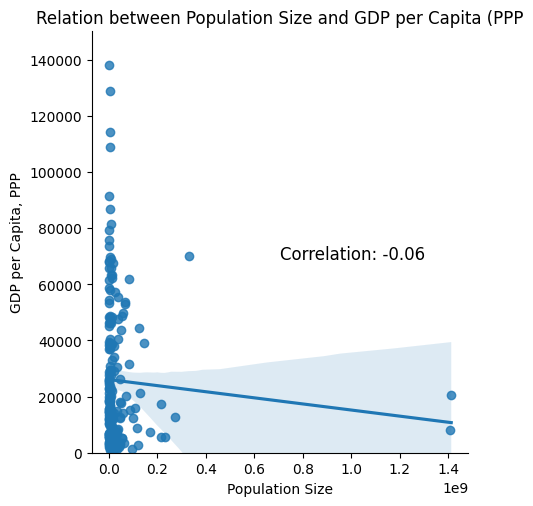

In [ ]:
# Calculate the correlation coefficient
correlation = countries_development_2021_df['Population, total [SP.POP.TOTL]'].corr(countries_development_2021_df['GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]'])

sns.lmplot(x='Population, total [SP.POP.TOTL]', y='GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]', data=countries_development_2021_df)
plt.title('Relation between Population Size and GDP per Capita (PPP')
plt.xlabel('Population Size')
plt.ylabel('GDP per Capita, PPP')
plt.ylim(bottom = 0)

# Add the correlation coefficient text
plt.text(x=0.50, y=0.46, s=f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Show the plot
plt.show()

The correlation between population size and GDP per capita, PPP (Purchasing Power Parity), is -0.06, which means no correlation.

What is clear from the scatter plot, is that there are a lot of small countries, a lot less middle-sized countries and only a few big to very big countries. Let's see it in a histogram:

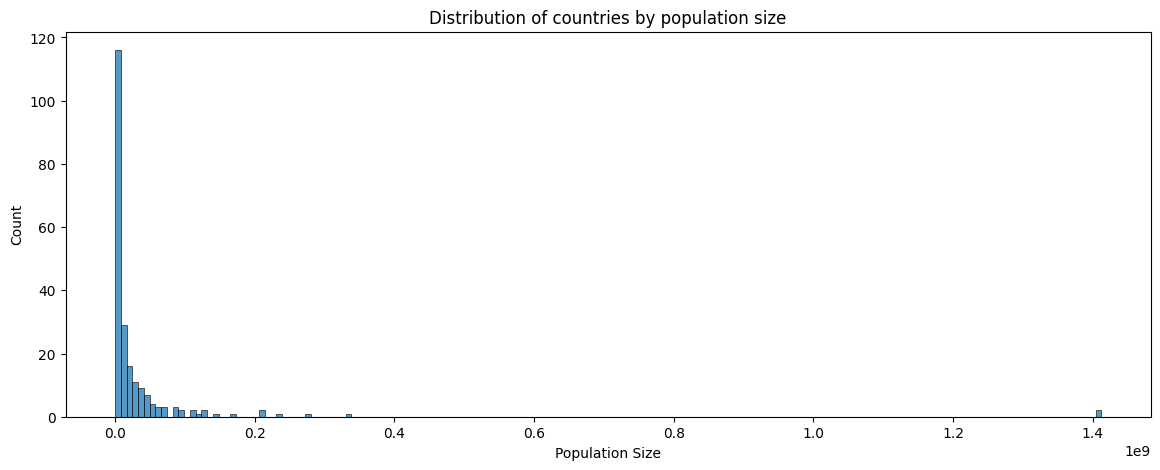

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(countries_development_2021_df['Population, total [SP.POP.TOTL]'])
plt.title('Distribution of countries by population size')
plt.xlabel('Population Size')
plt.show()

In the correlation matrices very low correlations were found with employment/unemployment. Of course, *employment to population ratio* had a high negative correlation with *unemployment* and *male unemployment* for example had a high correlation with *female unemployment*. But with other columns the correlations were low. Two examples of these low correlations will be shown in the following graphs:

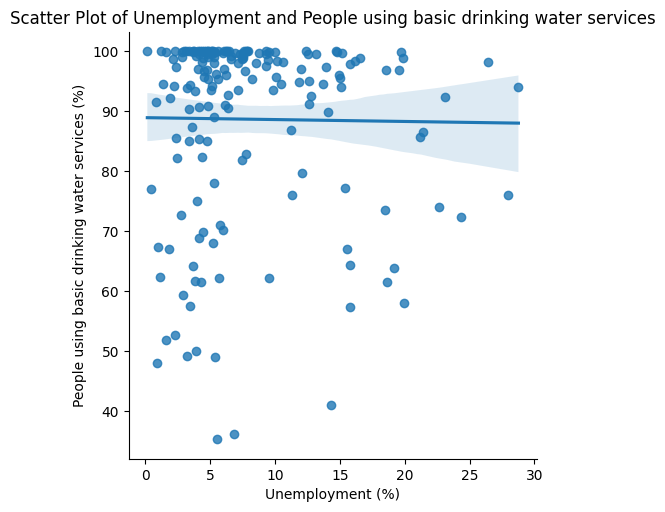

In [ ]:
sns.lmplot(x='Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]', y='People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]', data=countries_development_2021_df)
plt.title('Scatter Plot of Unemployment and People using basic drinking water services')
plt.xlabel('Unemployment (%)')
plt.ylabel('People using basic drinking water services (%)')
plt.show()

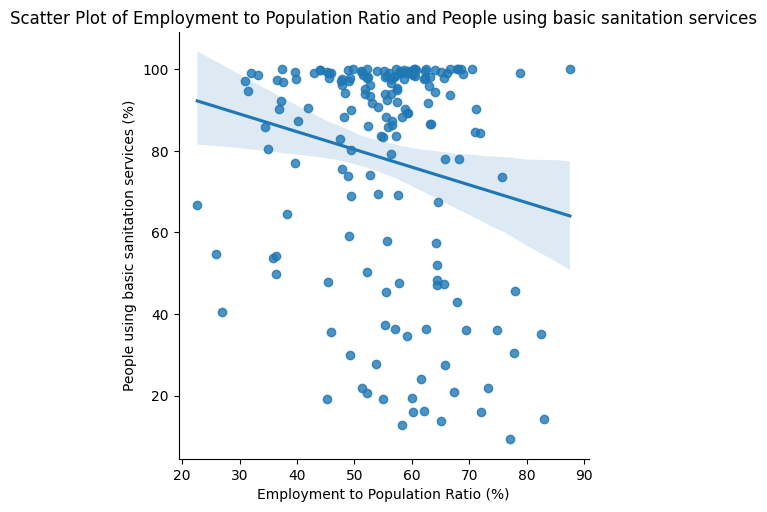

In [ ]:
sns.lmplot(x='Employment to population ratio, 15+, total (%) (modeled ILO estimate) [SL.EMP.TOTL.SP.ZS]', y='People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]', data=countries_development_2021_df)
plt.title('Scatter Plot of Employment to Population Ratio and People using basic sanitation services')
plt.xlabel('Employment to Population Ratio (%)')
plt.ylabel('People using basic sanitation services (%)')
plt.show()

Another column that had low correlations with other columns was inflation. An example of one of the higher correlations that inflation had with another column was with 'Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]'. It was a negative correlation of only -0.2.

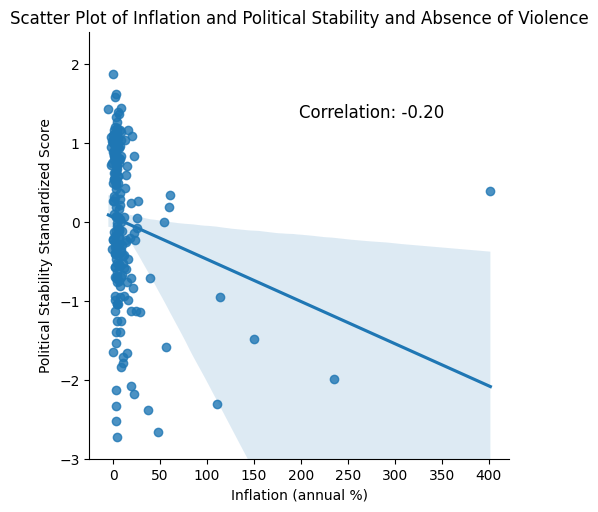

In [ ]:
# Calculate the correlation coefficient
correlation = countries_development_2021_df['Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]'].corr(countries_development_2021_df['Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]'])

sns.lmplot(x='Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]', y='Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]', data=countries_development_2021_df)
plt.title('Scatter Plot of Inflation and Political Stability and Absence of Violence')
plt.xlabel('Inflation (annual %)')
plt.ylabel('Political Stability Standardized Score')
plt.ylim(bottom = -3)

# Add the correlation coefficient text
plt.text(x=0.50, y=0.8, s=f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

I looked at death and birth rates of all the countries to see if the decrease in birth rate is preceded by a decrease in death rate. Unfortunately I couldn't extract a rule from this. Sometimes a decrease in birth rate indeed follows an earlier decrease in death rate. However, sometimes they happen at the same time. Other times they happen very gradually and it is impossible to see which occurred first. Finally, I have also seen line charts where the death rate started to rise and the birth rate was still going down.

Nevertheless, when looking at death rates of countries you also come across shocking historical events. See the next two graphs:

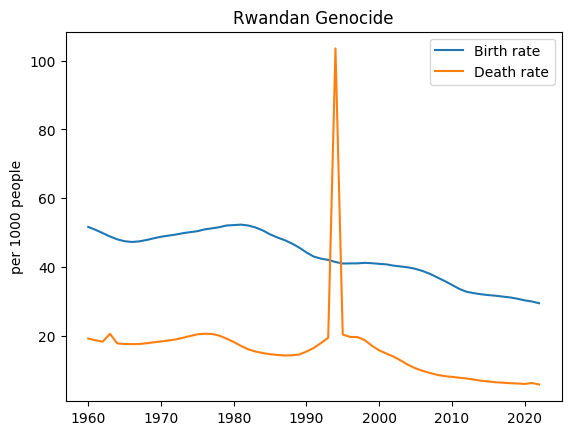

In [ ]:
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'Rwanda']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'Rwanda']['Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]'], label = 'Birth rate')
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'Rwanda']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'Rwanda']['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'], label = 'Death rate')
plt.title('Rwandan Genocide')
plt.ylabel('per 1000 people')
plt.legend()
plt.show()

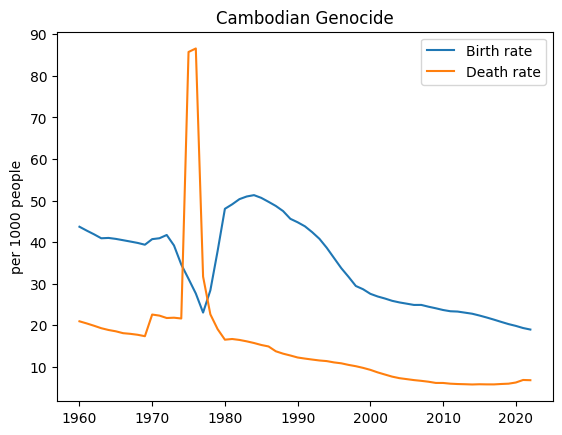

In [ ]:
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'Cambodia']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'Cambodia']['Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]'], label = 'Birth rate')
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'Cambodia']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'Cambodia']['Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]'], label = 'Death rate')
plt.title('Cambodian Genocide')
plt.ylabel('per 1000 people')
plt.legend()
plt.show()

The cambodian genocide, which was committed by the government led by the dictator Pol Pot, even had an effect on the birth rate. This is very exceptional and in this magnitude the only case in the dataset.

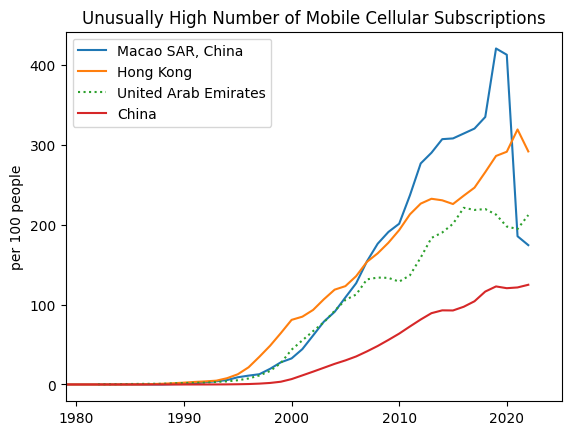

In [ ]:
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'Macao SAR, China']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'Macao SAR, China']['Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'], label = 'Macao SAR, China')
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'Hong Kong']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'Hong Kong']['Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'], label = 'Hong Kong')
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'United Arab Emirates']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'United Arab Emirates']['Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'], label = 'United Arab Emirates', linestyle = 'dotted')
plt.plot(countries_development_df.loc[countries_development_df['Country Name'] == 'China']['Time'], countries_development_df.loc[countries_development_df['Country Name'] == 'China']['Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'], label = 'China')
plt.title('Unusually High Number of Mobile Cellular Subscriptions')
plt.ylabel('per 100 people')
plt.xlim(left = 1979)
plt.legend()
plt.show()

The top two countries with the highest number of mobile cellular subscriptions somewhere in the period from 1979 to 2022 are Macao and Hong Kong, both special administrative regions of China. For comparison purposes, both the country with the third highest number of mobile cellular subscriptions (United Arab Emirates) and mainland China are included in the line chart. It is not entirely clear why the mobile cellular subscriptions per 100 people are/were so extremely high in Macao and Hong Kong, but tourism could be an explanation for this. According to the World Bank, the provider of the data, mobile cellular subscriptions include "the number of postpaid subscriptions, and the number of active prepaid accounts (i.e. that have been used during the last three months)".

**Conclusions**

**Global time trends**
When looking at time trends for the world as a whole, we see a lot of positive developments:

*   Death rates, birth rates and population growth going down since 1960
*   Life expectancy at birth making a spectacular rise from almost 51 years in 1960 to almost 72 in 2022!
* Urbanization going up consistently from less than 34% in 1960 to more than 56% in 2022
* Public infrastructure, like access to electricity, people using basic drink water services and basic sanitation services have gone up steadily in this century, since measurements of these variables by the World Bank began. The same can be said about universal health coverage.

There is one global development that is worrying:

*   The prevalence of undernourishment, after going down between 2001 (when the World Bank started measuring it) and 2018, has been going up every year since 2018. This happens in different countries, on three different continents. It remains unclear why, as it started one year before the corona pandemic, but the pandemic and the war in Ukraine, a main exporter of wheat, barley and corn, may have played a role in sustaining the trend.

**Highly correlating development indicators**
High positive correlations in the data of 2021 have been found between:
- access to electricity
- fixed broadband subscriptions (per 100 people)
- individuals using the Internet (% of population)
- life expectancy at birth
- people using at least basic drinking water services (% of population)
- people using at least basic sanitation services (% of population)
- survival to age 65, female
- survival to age 65, male
- universal health coverage

These variables all had a high negative correlation in the same year with birth rate.

Of course, the variables listed above are all related to how developed and rich a country is, but the correlations between these variables and GDP per capita (purchasing power parity) were a bit lower. So the variables grouped above may have something that is additional to a country's wealth alone.

**Causal inference**
With so many correlations it would also be nice if we could find out what causes what. For this causal inference was explored with the library DoWhy.

First, the causal effects of different treatment variables were estimated on two outcome variables, while defining all the other 44 variables as common causes. This led to results that were in some cases not logical at all, raising questions about whether the dataframe that was created for this causal inference had sufficient rows (1712) to control for 44 possible common causes.

Then, only two variables were defined as 'common cause': time and GDP per capita. This didn't lead to results that were obviously illogical, but now the causal model was poor. Maybe there was another common cause to both the defined treatment and outcome variables that was not taking into account?

This point was proven by including a third 'common cause' (access to electricity), while estimating the effect of people using the internet on female survival to age 65. It led to a much smaller effect than with only two defined 'common causes'.

Thus, it has proven to be challenging to perform causal inference with so many variables that all may affect each other.

However, the field of causal inference is very interesting, because sometimes it is only possible the have observational data, rather than experimental data. Apart from knowledge about causal inference, domain knowledge is also needed to define the right common causes.

**Population size**
No high correlations were found between population size and any of the qualitative variables. (With quantitative variables that also reflect size in some way, like GDP or surface area, there were moderate to high correlations). We could notice very clearly that there are many more small countries than large ones. This is one explanation for the fact that smaller countries are more prominent in the top 20 of lists of the performance of countries, like for example the Human Development Index (which considers health, education, income and living conditions).

**Unemployment and inflation**
Employment to population ratio and unemployment don't have high correlations with other columns. Certainly, they have a high negative correlation with each other, but not with other variables. The same can be said for inflation. There seems to be no correlation between these variables and for example life expectancy at birth or access to electricity.

The media and politicians pay a lot of attention to unemployment and inflation and they certainly have a negative effect on the economy and on society. But when looking at development indicators of the whole world, they don't seem to play much of a role.